In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Entanglement of a pair of quantum emitters via continuous fluorescence measurements: a tutorial

### MCSOLVE - Photocounting, Chap.4

In [3]:
# parameters
GAMMA = 1              # Atom decay rate
OMEGA = 1
T_1 = 1 / GAMMA  # time constant for the decay
ntraj = 100 # number of trajectories
I_2 = qeye(2)  # identity operator for 2-level system
sm = sigmam()  # lowering operator for 2-level system (atom)

# operators
sigma_minus_1 = tensor(sm, I_2) # lowering operator for atom 1
sigma_minus_2 = tensor(I_2, sm) # lowering operator for atom 2
sigma_minus_12 = tensor(sigma_minus_1, sigma_minus_2) # combined lowering operator for both atoms    

sigma_plus_1 = sigma_minus_1.dag() # raising operator for atom 1
sigma_plus_2 = sigma_minus_2.dag() # raising operator for atom       
sigma_plus_12 = tensor(sigma_plus_1, sigma_plus_2) # raising operator for both atoms


H_free_atom_1 = 0.5 * OMEGA * tensor(sigmaz(), I_2) # Free Hamiltonian atom 1
H_free_atom_2 = 0.5 * OMEGA * tensor(I_2, sigmaz()) # Free Hamiltonian atom 2
H_free = H_free_atom_1 + H_free_atom_2 # Free Hamiltonian for both atoms        

psi_0 = tensor(basis(2, 0), basis(2, 0)).proj() # initial vector state, |e, e> (the atoms must decay from the excited state!)
times = np.arange(0, 3*T_1, 0.001*T_1) # time vector

In [4]:
# solve the master equation using montecarlo equation (photodetection)
solutions = mcsolve(
    H_free, psi_0, times,
    c_ops=[np.sqrt(GAMMA) * sigma_minus_1,  np.exp(1j*np.pi/2)*np.sqrt(GAMMA) * sigma_minus_2], #Two collapsing operators for the two atoms
    ntraj=ntraj,
    options={"store_states": True, "keep_runs_results": True},
)

10.0%. Run time:   0.79s. Est. time left: 00:00:00:07
20.0%. Run time:   1.97s. Est. time left: 00:00:00:07
30.0%. Run time:   2.95s. Est. time left: 00:00:00:06
40.0%. Run time:   4.22s. Est. time left: 00:00:00:06
50.0%. Run time:   5.31s. Est. time left: 00:00:00:05
60.0%. Run time:   6.01s. Est. time left: 00:00:00:04
70.0%. Run time:   7.17s. Est. time left: 00:00:00:03
80.0%. Run time:   8.23s. Est. time left: 00:00:00:02
90.0%. Run time:   9.30s. Est. time left: 00:00:00:01
100.0%. Run time:  10.55s. Est. time left: 00:00:00:00
Total run time:  10.64s


In [ ]:
solutions_bell_ = mcsolve(
    H_free, bell_state("10"), times,
    c_ops=[np.sqrt(GAMMA) * sigma_minus_1,  np.exp(1j*np.pi/2)*np.sqrt(GAMMA) * sigma_minus_2], #Two collapsing operators for the two atoms
    ntraj=ntraj,
    options={"store_states": True, "keep_runs_results": True},
)

10.0%. Run time:   8.60s. Est. time left: 00:00:01:17
20.0%. Run time:  18.95s. Est. time left: 00:00:01:15
30.0%. Run time:  30.03s. Est. time left: 00:00:01:10
40.0%. Run time: 139.92s. Est. time left: 00:00:03:29
50.0%. Run time: 149.49s. Est. time left: 00:00:02:29
60.0%. Run time: 158.76s. Est. time left: 00:00:01:45
70.0%. Run time: 168.13s. Est. time left: 00:00:01:12
80.0%. Run time: 180.61s. Est. time left: 00:00:00:45
90.0%. Run time: 190.84s. Est. time left: 00:00:00:21
100.0%. Run time: 201.82s. Est. time left: 00:00:00:00
Total run time: 202.91s


In [126]:
stateee = sigma_minus_1 * psi_0 * sigma_plus_1
stateee

#Confirm that the state is correct

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]

In [ ]:
with open("psi_0_states.txt", "w") as file:
    file.write("\n".join(str(e) for e in solutions.runs_states[1]))

In [160]:
print(len(solutions.runs_states))
#List of list

100


In [ ]:
#solutions_bell_.runs_states[50][500]

Quantum object: dims=[[2, 2], [1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.        ]
 [0.70710678]
 [0.70710678]
 [0.        ]]

In [5]:
#List of concurrences : Rows = ntraj and columns = times
concurrences = np.zeros((ntraj, len(solutions.runs_states[0])))

for traj_idx in range(ntraj):
    for t_idx in range(len(solutions.runs_states[traj_idx])):
        state = solutions.runs_states[traj_idx][t_idx]
        concurrences[traj_idx, t_idx] = concurrence(state.proj())

# Media temporale sulle traiettorie
mean_concurrence = np.mean(np.array(concurrences), axis=0)

print(mean_concurrence)

[0. 0. 0. ... 0. 0. 0.]


In [5]:
#List of concurrences : Rows = ntraj and columns = times
concurrences_psi_0 = np.zeros((ntraj, len(solutions.runs_states[0])))

for traj_idx in range(ntraj):
    for t_idx in range(len(solutions.runs_states[traj_idx])):
        state = solutions.runs_states[traj_idx][t_idx]
        concurrences_psi_0[traj_idx, t_idx] = concurrence(state.proj())

# Media temporale sulle traiettorie
mean_concurrence_psi_0 = np.mean(np.array(concurrences_psi_0), axis=0)

print(mean_concurrence_psi_0)

[0. 0. 0. ... 0. 0. 0.]


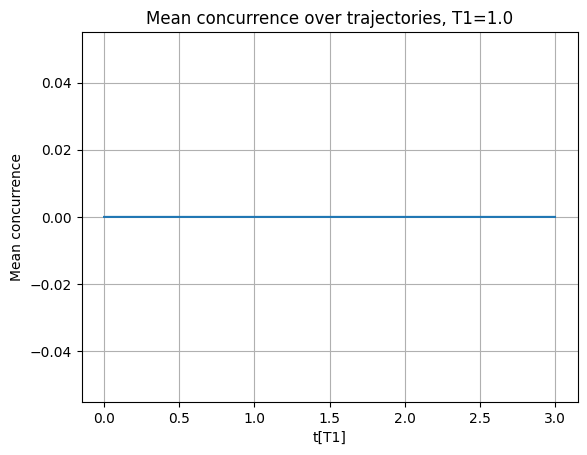

In [6]:
plt.plot(times, mean_concurrence)
plt.xlabel("t[T1]")
plt.ylabel("Mean concurrence")
plt.title(f"Mean concurrence over trajectories, T1={T_1}")
plt.grid(True)
plt.show()

Five different Kraus operators! They form a complete set of outcomes s.t. they "add" to identity. Then we may draw a number from a multinomial distribution at every time step, each
possibility of which corresponds to a given detector outcom

In [ ]:
#Evolution with Kraus operators

eps = 0.1 
sqrt = np.sqrt  #Keep it short

# M_00
M_00 = Qobj([
    [1 - eps,      0,           0,        0],
    [0,      sqrt(1 - eps),     0,        0],
    [0,            0,     sqrt(1 - eps),  0],
    [0,            0,           0,        1]
])

# M_10
M_10 = Qobj([
    [0, 0, 0, 0],
    [sqrt(eps * (1 - eps)/ 2) , 0, 0, 0],
    [sqrt(eps * (1 - eps)/ 2), 0, 0, 0],
    [0, sqrt(eps/2), sqrt(eps/2), 0]
])

# M_01
M_01 = Qobj([
    [0, 0, 0, 0],
    [-sqrt(eps * (1 - eps)/ 2) , 0, 0, 0],
    [sqrt(eps * (1 - eps)/ 2), 0, 0, 0],
    [0, sqrt(eps/2), -sqrt(eps/2), 0]
])

# M_20
M_20 = Qobj([
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [eps / sqrt(2), 0, 0, 0]
])

# M_02
M_02 = Qobj([
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [-eps / sqrt(2), 0, 0, 0]
])

kraus_ops = [M_00, M_10, M_01, M_20, M_02]

#Probabilities:

def compute_weights(q1, q2, q3, q4, gamma, dt):
    # Calcolo di Xi e Theta
    Xi = 1 + q1 / np.sqrt(2) + q2 / np.sqrt(6) + 2 * q3 / np.sqrt(3) #Squared symbol
    Theta = 1/4 + q1 / np.sqrt(2) + q2 / np.sqrt(6) + q3 / (2 * np.sqrt(3))

    # Coefficienti w_ij
    w_00 = 1 - dt * gamma * Xi + dt**2 * gamma**2 * Theta
    w_10 = gamma * dt * (3/2 - q4 / np.sqrt(2)) - gamma**2 * dt**2 * Theta
    w_01 = gamma * dt * (3/2 + q4 / np.sqrt(2)) - gamma**2 * dt**2 * Theta
    w_02 = gamma**2 * dt**2 / 2
    w_20 = w_02